# analyzing the effect of radially distributed reaction rates
Tim Tyree<br>
5.12.2021

In [1]:
from lib.my_initialization import *
import random,scipy
from lib.measure.compute_slope import *
from lib.measure.compute_sliding_slope import *
from lib.measure.powerlaw import *
%load_ext autoreload
%autoreload 2

from scipy import stats
alpha=0.1

# visualize the reaction rate modeling observed annihilation events
observed annihilation events are discussed in my other repository, [here](http://github.com/timtyree/care)

In [19]:
def comp_gen_extreme_value_pdf(x, shape, location, scale):
    #   // returns radially dependent scale that follows a generalize
    #   // extreme value probability distribution function
    # double val;double t;double p;
    shape=-1.*shape;
    val=(x-location)/scale;
    # //compute t(x)
    if(shape==0.):
        t=np.exp(-val);
    else:
        t=(1.+shape*val)**(-1./shape);
    # //compute pdf
    p=t**(shape+1.)*np.exp(-1.*t)/scale;
    return p;

In [220]:
# input_fn=search_for_file()
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-lr-600x600/param_qu_tmax_30/Log/ic600x600.0.1_traj_sr_1200_mem_0.csv"
# input_fn=f"{nb_dir}/../../care/notebooks/Data/reaction-ranges/initial-conditions-lr-300x300-param-qu-tmax-30-nbins-200-DT-2.00.csv"

#used for mle fit
# input_fn=f"{nb_dir}/../../Data/initial-conditions-lr-600x600/param_qu_tmax_30/ic0.1_traj_sr_1200_mem_0_rate_histogram.csv"
input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-lr-600x600/param_qu_tmax_30/ic0.1_traj_sr_1200_mem_0_rate_histogram.csv"
df_rrate=pd.read_csv(input_fn)
DT=2. # ms
# df_rrate.head()
range_values=df_rrate['r'].values
brate_values=df_rrate['brate'].values
drate_values=df_rrate['drate'].values

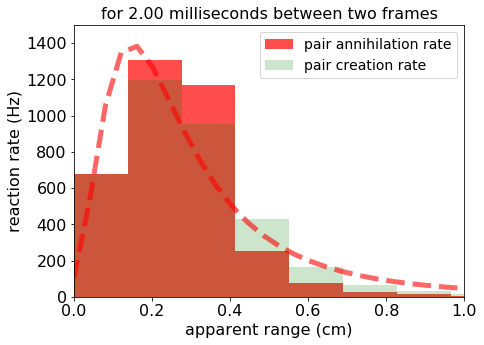

In [235]:
from scipy.stats import genextreme
import matplotlib.pyplot as plt

#mle fit to lr model: source: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-lr-600x600/param_qu_tmax_30/Log/ic600x600.0.1_traj_sr_1200_mem_0.csv
shape    =-0.338
location = 0.186# cm
scale    = 0.139# cm
rate0    = 1./DT*10**3 #Hz

fontsize=16;figsize=(7,5)
bin_ranges=range_values
bin_width=np.diff(bin_ranges)[0]
fig,ax=plt.subplots(figsize=figsize)
ax.bar(x=bin_ranges,height=drate_values,align='center',width=bin_width,alpha=0.7,color='red',label='pair annihilation rate')
ax.bar(x=bin_ranges,height=brate_values,align='center',width=bin_width,alpha=0.2,color='green',label='pair creation rate')
ax.set_xlabel('apparent range (cm)',fontsize=fontsize)
ax.set_ylabel('reaction rate (Hz)',fontsize=fontsize)
ax.legend(fontsize=fontsize-2)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
ax.set_title(f"for {DT:.2f} milliseconds between two frames",fontsize=fontsize)
x = np.linspace(0, 4, 100)
y = comp_gen_extreme_value_pdf(x,shape=shape,location=location,scale=scale)*rate0
ax.plot(x, y,
       'r--', lw=5, alpha=0.6, label='rrate_gev test')

ax.set_xlim([0,1])
ax.set_ylim([0,1500])
plt.show()

# visualize the effect of reaction rate modeling observed annihilation events
observed annihilation events are discussed in my other repository, [here](http://github.com/timtyree/care)

In [32]:
data_dir="/home/timothytyree/Docu%ments/GitHub/bgmc/python/data/osg_output/run_8_all.csv"
df=pd.read_csv(data_dir)
df.head()

,shape,set_second,reflect,r,niter,kappa,dt,beta,N,L,D,CollRate
0,-0.338,0,0,0.186,250,500,0.000001,0.01,12,5.0,0.25,52.027729
1,-0.338,0,0,0.186,250,500,0.000001,0.01,12,5.0,0.50,68.354024
2,-0.338,0,0,0.186,250,500,0.000001,0.01,12,5.0,0.75,86.492084
3,-0.338,0,0,0.186,250,500,0.000001,0.01,12,5.0,1.00,98.353894
4,-0.338,0,0,0.186,250,500,0.000001,0.01,12,5.0,1.25,122.295526


In [33]:
df.columns

Index(['shape', 'set_second', 'reflect', 'r', 'niter', 'kappa', 'dt', 'beta',
       'N', 'L', 'D', 'CollRate'],
      dtype='object')

In [41]:
#derived values
# df['CollRate']=1./df['CollTime']
df['A']=df['L']**2
df['q']=df['N']/df['A'] #number of tips per square centimeter
df['w']=df['CollRate']/df['A'] #[mHz?]/cm^2

df=df[df.niter==250].copy()
#extract column values
r_values=np.array(sorted(set(df.r.values)))#cm
D_values=np.array(sorted(set(df.D.values)))#cm^2/s
L_values=np.array(sorted(set(df.L.values)))#cm
A_values=L_values**2#cm^2
kappa_values=np.array(sorted(set(df.kappa.values)))#1/s
beta_values=np.array(sorted(set(df.beta.values)))#1/s
shape_values=np.array(sorted(set(df['shape'].values)))#1/s
set_second_values=np.array(sorted(set(df.set_second.values)))
reflect_values=np.array(sorted(set(df.reflect.values)))

In [42]:
#make test for whether there is one input parameter present in an input DataFrame1
print(r_values)
print(D_values)
print(L_values)
print(kappa_values)
print(beta_values)
print(shape_values)
print(set_second_values)
print(reflect_values)

[0.186]
[0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
[ 5.       7.07107 10.      13.7477 ]
[500]
[0.01  0.1   0.139 1.   ]
[-0.338  0.     0.338]
[0]
[0]


In [207]:
#query the DataFrame
query =(df.set_second==set_second_values[0])&(df.reflect==reflect_values[0])
query&=df.r==r_values[0]
query&=df.D==D_values[-1]
query&=df.beta==beta_values[2]
query&=df['shape']==shape_values[0]
dff=df[query]
kappa_values=np.array(sorted(set(dff.kappa.values)))
dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
# dg=dff.kappa==kappa_values[0]#Fenton-Karma fit

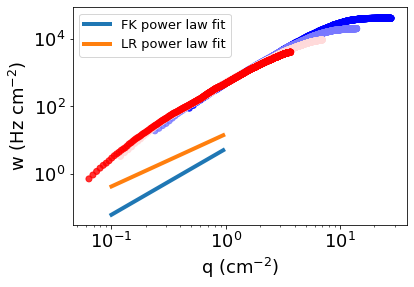

In [210]:
#plot fits for full model
m_fk=1.945;#+-0.030; B_fk=2.441+-0.051
m_lr=1.544;#+-0.034; B_lr=5.870+-0.137
M_fk=5.67;#+-0.39 Hz*cm^{2(m-1)}
M_lr=15.37;#+-1.57 Hz*cm^{2(m-1)}
# RMSE_fk=0.1252 Hz/cm^2
# RMSE_lr=0.0974 Hz/cm^2
# R^2=0.997 (FK)
# R^2=0.994 (LR)
# yscale=10**3
xv=np.arange(0.1,1.,.05)
yv_fk=M_fk*(xv)**m_fk
yv_lr=M_lr*(xv)**m_lr

fontsize=16
# plt.xlim([0.1,1])
# plt.ylim([1e-1,15])
plt.yscale('log')
plt.xscale('log')
plt.plot(xv,yv_fk,label='FK power law fit',zorder=3,lw=4)
plt.plot(xv,yv_lr,label='LR power law fit',zorder=3,lw=4)

x_values=dg.q.values
y_values=dg.w.values
c_values=dg.L.values

fontsize=18
plt.scatter(x_values,y_values,c=c_values,alpha=0.8,cmap='bwr')
# plt.title(u'comparison to simulation\nwith two hybrid modes',fontsize=fontsize)
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-5)
plt.show()

In [132]:
#slice relevant particle density to the particle densities observed from the full model
L=L_values[1]
x_values=dg[dg.L==L].q.values
y_values=dg[dg.L==L].w.values
qmin=0.1;qmax=0.4
boo=(x_values>qmin)&(x_values<qmax)
dict_ci=compute_95CI_ols(np.log(x_values[boo]),np.log(y_values[boo]))
print(*dict_ci)
print(*dict_ci.values())
print(f"Therefore, 95% confidence intervals do not include exponent values observed from the Luo-Rudy model.")

m Delta_m b Delta_b Rsquared
2.572407450681694 0.09928932244259944 6.589794781195613 0.11561507749752166 0.9973996438493534
Therefore, 95% confidence intervals do not include exponent values observed from the Luo-Rudy model.


In [133]:
#compute sliding m
xavg_values,slope_values,Rsquared_values = compute_sliding_slope_loglog(x_values,y_values,    
    x_min=qmin,
    window_width=5,
    stepsize=None,
)
xavg_values.shape

(445,)

Note: clipping at high particle densities
explains this decreasing exponent...
Decreasing dt to 1e-7 ms fixed this issue
but also required too much cpu time...


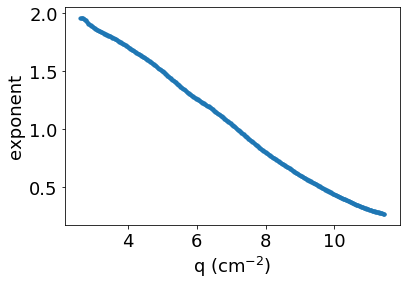

In [134]:
fontsize=18
x=xavg_values[:-1]
# y=Rsquared_values[:-1]
y=slope_values[:-1]
plt.scatter(x,y,s=10)
# plt.xlabel('N',fontsize=fontsize)
# plt.ylabel('Collision Rate',fontsize=fontsize)
# plt.xscale('log')
# plt.title(u'comparison to simulation\nwith two hybrid modes',fontsize=fontsize)
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'exponent', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
print(f"""Note: clipping at high particle densities\nexplains this decreasing exponent...
Decreasing dt to 1e-7 ms fixed this issue\nbut also required too much cpu time...""")
plt.show()

# print powerlaw fit of trial modeling LR model for several energy gaps and several D ratios

In [144]:
def slice_df_and_print_powerlaw_fit(r,D,L,beta,shape,q_min=0.1,q_max=0.4):
    '''map from trial to power law fit in interval q_min to q_max'''
    #query the DataFrame
    query=df.r==r
    query&=df.D==D
    query&=df.beta==beta
    query&=df['shape']==shape
    dff=df[query]
    kappa_values=np.array(sorted(set(dff.kappa.values)))
    dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
    # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit

    x_values=dg.q.values
    y_values=dg.w.values

    # q_min=0.1;q_max=.4
    # boo=(x_values>q_min)&(x_values<q_max)
    # x=np.log(x_values[boo])
    # y=np.log(y_values[boo])
    # dict_out=compute_95CI_ols(x,y)
    # dict_out
    boo=(x_values>q_min)&(x_values<q_max)
    x=x_values[boo]
    y=y_values[boo]
    print_fit_power_law(x,y)

In [163]:
beta=beta_values[0]
shape=shape_values[0]

r=r_values[0];D=D_values[3];L=L_values[1];
slice_df_and_print_powerlaw_fit(r,D,L,beta,shape)

m=3.722+-0.238; B=4.785+-0.385
M= 339.11+-329.75 Hz*cm^{2(m-1)}
RMSE=2.0144 Hz/cm^2
R^2=0.914


In [169]:
r=r_values[0];D=D_values[-1];
# beta_values[2]
shape=shape_values[0]
for beta in beta_values:#[::2]:
    print(f"for r={r} cm and D={D} cm^2/s fixed,")
    print(f"the powerlaw fit for scale={beta} cm and shape={shape} was")
    slice_df_and_print_powerlaw_fit(r,D,L,beta,shape)
    print(f'')    

for r=0.18600000000000005 cm and D=2.0 cm^2/s fixed,
the powerlaw fit for scale=0.01 cm and shape=-0.338 was
m=3.456+-0.207; B=5.359+-0.386
M= 330.81+-273.83 Hz*cm^{2(m-1)}
RMSE=2.0691 Hz/cm^2
R^2=0.923

for r=0.18600000000000005 cm and D=2.0 cm^2/s fixed,
the powerlaw fit for scale=0.1 cm and shape=-0.338 was
m=2.530+-0.087; B=12.987+-0.468
M= 657.14+-245.06 Hz*cm^{2(m-1)}
RMSE=3.8632 Hz/cm^2
R^2=0.973

for r=0.18600000000000005 cm and D=2.0 cm^2/s fixed,
the powerlaw fit for scale=0.139 cm and shape=-0.338 was
m=2.366+-0.064; B=15.793+-0.453
M= 684.98+-191.50 Hz*cm^{2(m-1)}
RMSE=3.8452 Hz/cm^2
R^2=0.983

for r=0.18600000000000005 cm and D=2.0 cm^2/s fixed,
the powerlaw fit for scale=1.0 cm and shape=-0.338 was
m=1.963+-0.069; B=40.710+-1.800
M= 1447.21+-594.80 Hz*cm^{2(m-1)}
RMSE=16.8214 Hz/cm^2
R^2=0.972



__Result__
- for a fixed shape parameter, increasing beta appears to decrease the m and to increase M... a focused test at a low dt=1e-7 should confirm


In [171]:
r=r_values[0];D=D_values[-1];
beta= beta_values[2]
# shape=shape_values[0]
for shape in shape_values:#[::2]:
    print(f"for r={r} cm and D={D} cm^2/s fixed,")
    print(f"the powerlaw fit for scale={beta} cm and shape={shape} was")
    slice_df_and_print_powerlaw_fit(r,D,L,beta,shape)
    print(f'')    

for r=0.18600000000000005 cm and D=2.0 cm^2/s fixed,
the powerlaw fit for scale=0.139 cm and shape=-0.338 was
m=2.366+-0.064; B=15.793+-0.453
M= 684.98+-191.50 Hz*cm^{2(m-1)}
RMSE=3.8452 Hz/cm^2
R^2=0.983

for r=0.18600000000000005 cm and D=2.0 cm^2/s fixed,
the powerlaw fit for scale=0.139 cm and shape=0.0 was
m=2.847+-0.121; B=10.318+-0.419
M= 768.05+-377.71 Hz*cm^{2(m-1)}
RMSE=4.3196 Hz/cm^2
R^2=0.960

for r=0.18600000000000005 cm and D=2.0 cm^2/s fixed,
the powerlaw fit for scale=0.139 cm and shape=0.338 was
m=3.655+-0.235; B=7.230+-0.516
M= 1382.03+-1496.76 Hz*cm^{2(m-1)}
RMSE=6.5554 Hz/cm^2
R^2=0.913



__Result__ decreasing shape appears to increase both M and m

__Result__ the slope is still superlinear overall, but might be sufficiently sublinear for large beta... worth trying again at low shape...
- TODO: make slide summarizing all this
- TODO: make a nice plot showing ^this example

In [172]:
data_dir

'/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_8_all.csv'

In [176]:
import sys

text_fn=data_dir.replace('.csv','_powerfits.txt')

original_stdout = sys.stdout # Save a reference to the original standard output

with open(text_fn, 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    #     r=r_values[1];D=D_values[3];
    for r in r_values:
        for D in D_values:
            for L in L_values:
                for beta in beta_values:
                    for shape in shape_values:
                        print(f"for r={r:.3f} cm, D={D} cm^2/s and L={L:.3f} cm fixed,")
                        print(f"the powerlaw fit for scale={beta} cm and shape={shape} was")
                        slice_df_and_print_powerlaw_fit(r,D,L,beta,shape)
                        print(f'')

sys.stdout = original_stdout # Reset the standard output to its original value
print(f'output redirected to {text_fn}.')


output redirected to /home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_8_all_powerfits.txt.


__Result__
- no trials exhibited exponent significantly smaller than m<1.9. 
- the robust exponents are still too large to support the LR model, which has m=1.544...

# visualizing beta independence

In [236]:
# r=r_values[0];D=D_values[-1];L=L_values[1]
# shape=shape_values[0]
# for beta in beta_values:#[::2]:
#     #query the DataFrame
#     query=df.r==r
#     query&=df.D==D
#     query&=df.L==L
#     query&=df.beta==beta
#     query&=df['shape']==shape
#     dff=df[query]
#     kappa_values=np.array(sorted(set(dff.kappa.values)))
#     dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
#     # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit

#     x_values=dg.q.values
#     y_values=dg.w.values
#     c_values=dg.beta.values

#     plt.scatter(x_values,y_values,label=r"$\beta =$ "+f"{beta:.3f} cm")#,c=c_values,alpha=0.8,cmap='bwr')

# fontsize=18
# plt.xscale('log')
# plt.yscale('log')
# plt.legend(fontsize=fontsize-2)
# plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
# plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
# plt.tick_params(axis='both', which='major', labelsize=fontsize)
# plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.show()

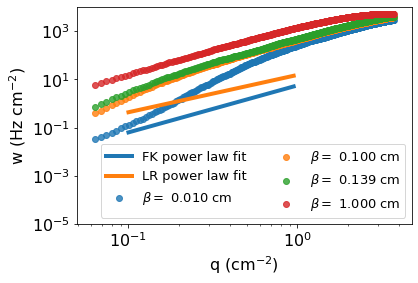

In [237]:
#plot fits for full model
m_fk=1.945;#+-0.030; B_fk=2.441+-0.051
m_lr=1.544;#+-0.034; B_lr=5.870+-0.137
M_fk=5.67;#+-0.39 Hz*cm^{2(m-1)}
M_lr=15.37;#+-1.57 Hz*cm^{2(m-1)}
# RMSE_fk=0.1252 Hz/cm^2
# RMSE_lr=0.0974 Hz/cm^2
# R^2=0.997 (FK)
# R^2=0.994 (LR)
# yscale=10**3
xv=np.arange(0.1,1.,.05)
yv_fk=M_fk*(xv)**m_fk
yv_lr=M_lr*(xv)**m_lr

fontsize=16
# plt.xlim([0.1,1])
# plt.ylim([1e-1,15])
plt.yscale('log')
plt.xscale('log')
plt.plot(xv,yv_fk,label='FK power law fit',zorder=3,lw=4)
plt.plot(xv,yv_lr,label='LR power law fit',zorder=3,lw=4)

#plot data
r=r_values[0];D=D_values[-1];L=L_values[-1]
shape=shape_values[0]
for beta in beta_values:#[::2]:
    #query the DataFrame
    query=df.r==r
    query&=df.D==D
    query&=df.L==L
    query&=df.beta==beta
    query&=df['shape']==shape
    dff=df[query]
    kappa_values=np.array(sorted(set(dff.kappa.values)))
    dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
    # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit

    x_values=dg.q.values
    y_values=dg.w.values
    c_values=dg.beta.values

    plt.scatter(x_values,y_values,label=r"$\beta =$ "+f"{beta:.3f} cm",alpha=0.8)#,cmap='bwr')

plt.ylim([1e-5,1e4])
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-3,ncol=2,loc='lower right')
plt.show()

In [193]:
#TODO: plot m+-Delta_m versus energy gap for LR and FK model
#plot data
kappa=kappa_values[0]
# r=1.;D=5.;Dratio=1000;L=L_values[-1]
eg_lst=[];m_lst=[];Dm_lst=[];Rsq_lst=[]
for beta in beta_values:
    try:
        #query the DataFrame
        query=df.r==r
        query&=df.D==D
        query&=df.L==L
        query&=df.beta==beta
        query&=df['shape']==shape
        dff=df[query]
        kappa_values=np.array(sorted(set(dff.kappa.values)))
        dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
        # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit
        x_values=dg.q.values
        y_values=dg.w.values

        q_min=0.1;q_max=0.4
        boo=(x_values>q_min)&(x_values<q_max)
        x=x_values[boo]
        y=y_values[boo]

        # print_fit_power_law(x,y)
        B,Delta_B,m,Delta_m,Rsq=fit_power_law(x,y)
        rmse=compute_power_rmse(x,y,m,B)
        M, Delta_M= comp_power_scale(B,Delta_B,m,Delta_m)
    #     print(f"m={m:.3f}+-{Delta_m:.3f}; B={B:.3f}+-{Delta_B:.3f}")
    #     print(f"M=B**m={M:.2f}+-{Delta_M:.2f} Hz*cm^{{2(m-1)}}")
    #     print(f"RMSE={rmse:.4f} Hz/cm^2")
    #     print(f"R^2={Rsq:.3f}")

        eg_lst.append(beta)
        m_lst.append(m)
        Dm_lst.append(Delta_m)
        Rsq_lst.append(Rsq)
    except AssertionError as e:
        pass
print(Rsq_lst)

[0.9993935682244246, 0.9965608521139726, 0.9976978519138612, 0.9996717972874127]


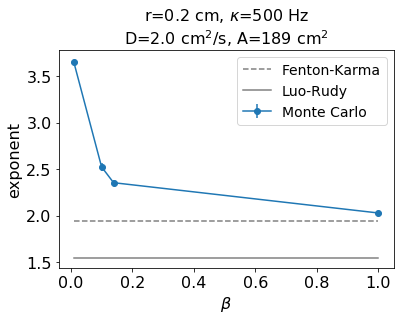

considering 0.1<q<0.4


In [198]:
m_fk=1.945#1.858;#+-0.027; B_fk=2.464+-0.030<br>
m_lr=1.544#1.638;#+-0.017; B_fk=5.588+-0.067
plt.errorbar(eg_lst, m_lst, yerr=Dm_lst, fmt='-o',label='Monte Carlo')
plt.plot(eg_lst, m_fk+0.*np.array(eg_lst), '--',c='gray',label='Fenton-Karma')
plt.plot(eg_lst, m_lr+0.*np.array(eg_lst), '-',c='gray',label='Luo-Rudy')

# plt.scatter(Dtdt_lst,m_lst,marker='^')
# plt.xscale('log')
title=f"r={r:.1f} cm, "+r"$\kappa$="+f"{kappa:.0f} Hz\nD={D} cm"+r"$^2$/s"+f", A={L**2:.0f} cm"+r"$^2$"
plt.title(title,fontsize=fontsize)
plt.xlabel(r'$\beta$',fontsize=fontsize)
plt.ylabel('exponent',fontsize=fontsize)
# plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.legend(fontsize=fontsize-8)#,ncol=2)
# plt.xlim([10,50])
# plt.ylim([0.9,2.3])
# plt.grid('on')
plt.legend(fontsize=fontsize-2)
plt.show()
# print("considering 20<N<50 spiral tips")
# print("considering N<20 spiral tips")
print(f"considering {q_min}<q<{q_max}")

# visualizing shape independence

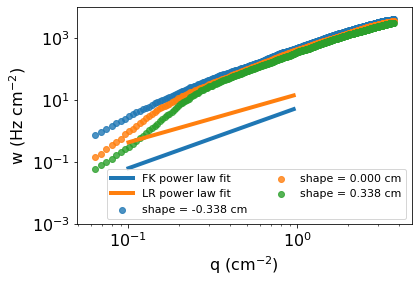

In [202]:
#plot fits for full model
m_fk=1.945;#+-0.030; B_fk=2.441+-0.051
m_lr=1.544;#+-0.034; B_lr=5.870+-0.137
M_fk=5.67;#+-0.39 Hz*cm^{2(m-1)}
M_lr=15.37;#+-1.57 Hz*cm^{2(m-1)}
# RMSE_fk=0.1252 Hz/cm^2
# RMSE_lr=0.0974 Hz/cm^2
# R^2=0.997 (FK)
# R^2=0.994 (LR)
# yscale=10**3
xv=np.arange(0.1,1.,.05)
yv_fk=M_fk*(xv)**m_fk
yv_lr=M_lr*(xv)**m_lr

fontsize=16
# plt.xlim([0.1,1])
# plt.ylim([1e-1,15])
plt.yscale('log')
plt.xscale('log')
plt.plot(xv,yv_fk,label='FK power law fit',zorder=3,lw=4)
plt.plot(xv,yv_lr,label='LR power law fit',zorder=3,lw=4)

#plot data
r=r_values[0];D=D_values[-1];L=L_values[-1]
beta=beta_values[2]
for shape in shape_values:#[::2]:
    #query the DataFrame
    query=df.r==r
    query&=df.D==D
    query&=df.L==L
    query&=df.beta==beta
    query&=df['shape']==shape
    dff=df[query]
    kappa_values=np.array(sorted(set(dff.kappa.values)))
    dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
    # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit

    x_values=dg.q.values
    y_values=dg.w.values
    plt.scatter(x_values,y_values,label=r"shape = "+f"{shape:.3f} cm",alpha=0.8)#,cmap='bwr')

plt.ylim([1e-3,1e4])
plt.xlabel(r'q (cm$^{-2}$)',fontsize=fontsize)
plt.ylabel(r'w (Hz cm$^{-2}$)', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
plt.legend(fontsize=fontsize-5,ncol=2,loc='lower right')
plt.show()

In [204]:
#TODO: plot m+-Delta_m versus energy gap for LR and FK model
#plot data
kappa=kappa_values[0]
# r=1.;D=5.;Dratio=1000;L=L_values[-1]
eg_lst=[];m_lst=[];Dm_lst=[];Rsq_lst=[]
for shape in shape_values:
    try:
        #query the DataFrame
        query=df.r==r
        query&=df.D==D
        query&=df.L==L
        query&=df.beta==beta
        query&=df['shape']==shape
        dff=df[query]
        kappa_values=np.array(sorted(set(dff.kappa.values)))
        dg=dff[dff.kappa==kappa_values[-1]]#Luo-Rudy fit
        # dg=dff[dff.kappa==kappa_values[0]]#Fenton-Karma fit
        x_values=dg.q.values
        y_values=dg.w.values

        q_min=0.1;q_max=0.4
        boo=(x_values>q_min)&(x_values<q_max)
        x=x_values[boo]
        y=y_values[boo]

        # print_fit_power_law(x,y)
        B,Delta_B,m,Delta_m,Rsq=fit_power_law(x,y)
        rmse=compute_power_rmse(x,y,m,B)
        M, Delta_M= comp_power_scale(B,Delta_B,m,Delta_m)
    #     print(f"m={m:.3f}+-{Delta_m:.3f}; B={B:.3f}+-{Delta_B:.3f}")
    #     print(f"M=B**m={M:.2f}+-{Delta_M:.2f} Hz*cm^{{2(m-1)}}")
    #     print(f"RMSE={rmse:.4f} Hz/cm^2")
    #     print(f"R^2={Rsq:.3f}")

        eg_lst.append(shape)
        m_lst.append(m)
        Dm_lst.append(Delta_m)
        Rsq_lst.append(Rsq)
    except AssertionError as e:
        pass
print(Rsq_lst)

[0.9976978519138612, 0.9848489506286213, 0.9853201021654854]


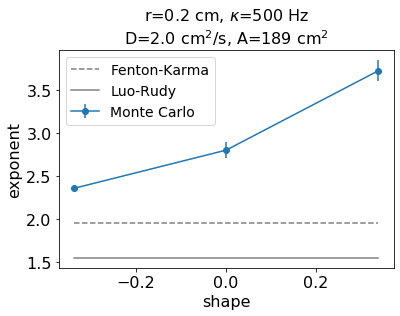

considering 0.1<q<0.4


In [205]:
m_fk=1.945#1.858;#+-0.027; B_fk=2.464+-0.030<br>
m_lr=1.544#1.638;#+-0.017; B_fk=5.588+-0.067
plt.errorbar(eg_lst, m_lst, yerr=Dm_lst, fmt='-o',label='Monte Carlo')
plt.plot(eg_lst, m_fk+0.*np.array(eg_lst), '--',c='gray',label='Fenton-Karma')
plt.plot(eg_lst, m_lr+0.*np.array(eg_lst), '-',c='gray',label='Luo-Rudy')

# plt.scatter(Dtdt_lst,m_lst,marker='^')
# plt.xscale('log')
title=f"r={r:.1f} cm, "+r"$\kappa$="+f"{kappa:.0f} Hz\nD={D} cm"+r"$^2$/s"+f", A={L**2:.0f} cm"+r"$^2$"
plt.title(title,fontsize=fontsize)
plt.xlabel(r'shape',fontsize=fontsize)
plt.ylabel('exponent',fontsize=fontsize)
# plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=0)
# plt.legend(fontsize=fontsize-8)#,ncol=2)
# plt.xlim([10,50])
# plt.ylim([0.9,2.3])
# plt.grid('on')
plt.legend(fontsize=fontsize-2)
plt.show()
# print("considering 20<N<50 spiral tips")
# print("considering N<20 spiral tips")
print(f"considering {q_min}<q<{q_max}")